In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("final_data.csv")
df.describe()

,Alfas,Frenkans,Emilim
count,34034.000000,34034.00000,34034.000000
mean,1.834706,10.50000,0.939078
std,0.098616,5.49039,0.092310
min,1.660000,1.00000,0.113001
25%,1.750000,5.75000,0.933379
50%,1.835000,10.50000,0.963477
75%,1.920000,15.25000,0.983845
max,2.000000,20.00000,0.999999


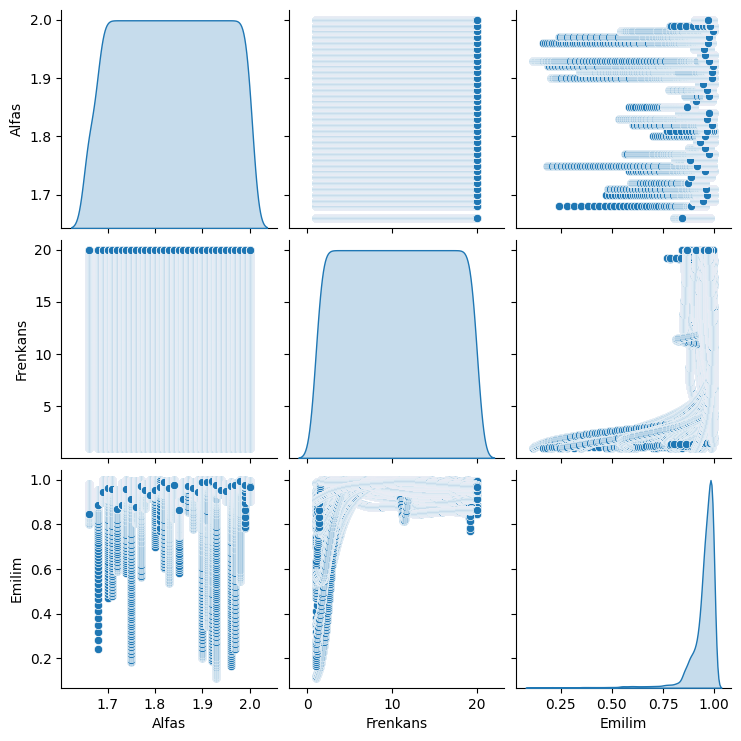

In [5]:
sns.pairplot(df, diag_kind="kde")
plt.show()

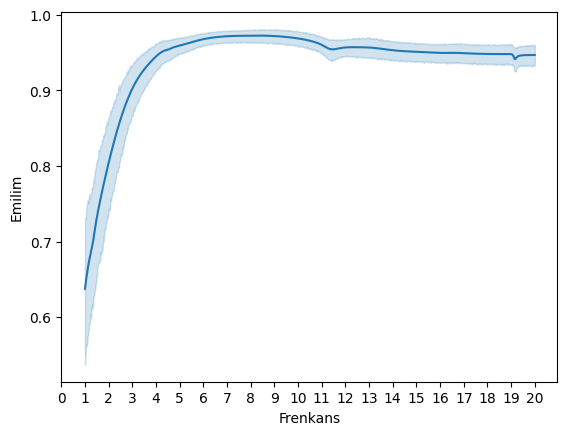

In [6]:
sns.lineplot(x=df["Frenkans"], y=df["Emilim"])
plt.xticks(np.arange(0, 21, 1)) 

plt.show()

In [7]:
def plot_emilim_for_alfas(df, a_value):
    """
    Belirli bir Alfas değeri için Frekans'a karşı Emilim grafiği çizer.
    
    Parametreler:
        df (DataFrame): Veri çerçevesi
        a_value (float): Grafik çizmek istediğiniz Alfas değeri
    """
    # Belirtilen Alfas değerine sahip verileri filtrele
    filtered_data = df[df["Alfas"] == a_value]
    
    # Grafik çizimi
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=filtered_data["Frenkans"], y=filtered_data["Emilim"], ci=95)
    
    # Grafik başlıkları ve etiketler
    plt.title(f"Alfas = {a_value} için Emilim Değerleri", fontsize=14)
    plt.xlabel("Frekans", fontsize=12)
    plt.ylabel("Emilim", fontsize=12)
    plt.grid(alpha=0.3)
    plt.xticks(np.arange(0, 21, 1)) 
    plt.show()


C:\Users\denem\AppData\Local\Temp\ipykernel_22324\3426362578.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x=filtered_data["Frenkans"], y=filtered_data["Emilim"], ci=95)


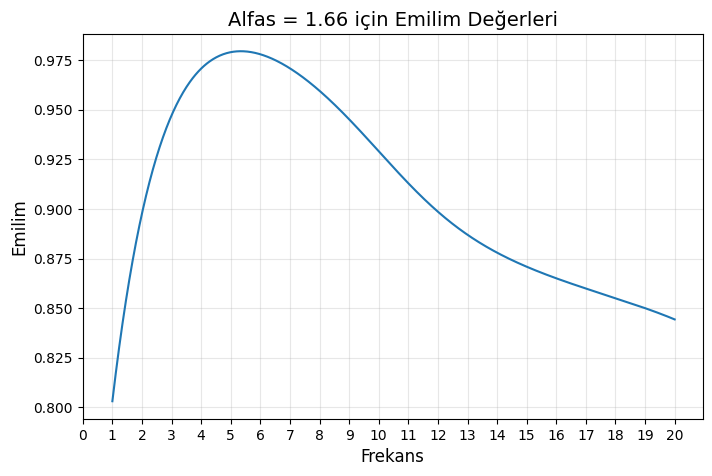

In [8]:
plot_emilim_for_alfas(df, 1.66)


C:\Users\denem\AppData\Local\Temp\ipykernel_4344\1905849860.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x=filtered_data["Frenkans"], y=filtered_data["Emilim"], ci=95)


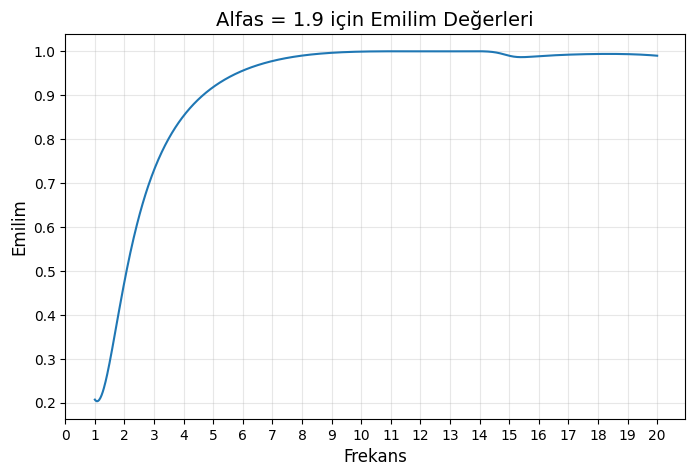

In [11]:
plot_emilim_for_alfas(df, 1.9)


In [12]:
def calculate_mean_emilim_by_alfas(df):
    """
    Her bir Alfas değeri için Emilim ortalamasını hesaplar.

    Parametreler:
        df (DataFrame): Veri çerçevesi
    
    Dönüş:
        pandas.DataFrame: Alfas ve ilgili Emilim ortalamalarını içeren bir DataFrame
    """
    # Her Alfas için Emilim sütununun ortalamasını hesapla
    mean_emilim = df.groupby("Alfas")["Emilim"].mean().reset_index()
    mean_emilim.columns = ["Alfas", "Mean_Emilim"]  # Sütunları yeniden adlandır
    return mean_emilim

# Örnek Kullanım:
# alfas_mean_df = calculate_mean_emilim_by_alfas(df)
# print(alfas_mean_df)



In [13]:
calculate_mean_emilim_by_alfas(df)

,Alfas,Mean_Emilim
0,1.66,0.909906
1,1.68,0.908380
2,1.69,0.975278
3,1.70,0.951340
4,1.71,0.959964
5,1.72,0.899051
6,1.73,0.932736
7,1.74,0.951220
8,1.75,0.910129
9,1.76,0.918941


In [9]:
def plot_boxplot_for_alfas(df, alfas_value):
    """
    Verilen bir Alfas değeri için Emilim kutu grafiğini çizer.

    Parametreler:
        df (DataFrame): Veri çerçevesi
        alfas_value (float): Alfas değeri (örneğin 1.8 veya 2.0 gibi)

    Çıktı:
        Grafik: Verilen Alfas değeri için Emilim kutu grafiği
    """
    # Seçilen Alfas değerine karşılık gelen veriyi filtrele
    filtered_data = df[df["Alfas"] == alfas_value]

    # Grafik oluştur
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=filtered_data["Emilim"], color="skyblue")
   


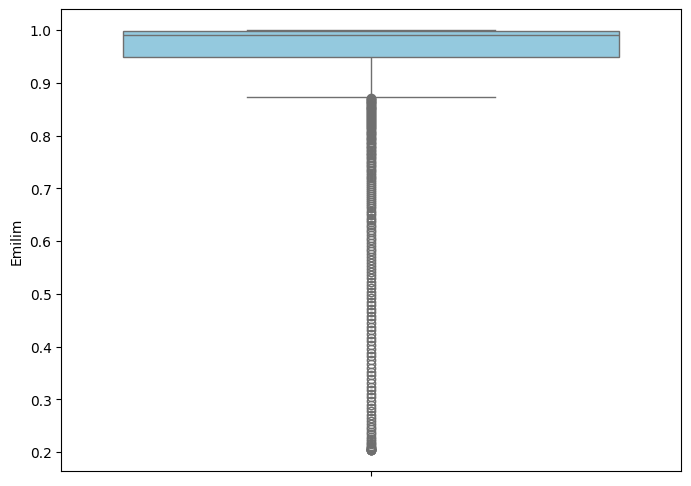

In [10]:
plot_boxplot_for_alfas(df,1.9)

In [11]:
def plot_boxplot_for_all_alfas(df):
    """
    Tüm benzersiz Alfas değerleri için Emilim kutu grafiği çizer.

    Parametreler:
        df (DataFrame): Veri çerçevesi

    Çıktı:
        Grafik: Tüm Alfas değerleri için Emilim kutu grafiği
    """
    # Grafik oluştur
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="Alfas", y="Emilim", data=df, palette="coolwarm")
    
    # Grafik başlıkları ve etiketler
    plt.title("Tüm Alfas Değerleri için Emilim Dağılımı", fontsize=16)
    plt.xlabel("Alfas Değerleri", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.grid(axis="y", alpha=0.3)
    plt.xticks(rotation=45)  # X eksenindeki değerleri eğimli göster

    # Grafik gösterimi
    plt.show()

# Örnek Kullanım:
# plot_boxplot_for_all_alfas(df)


C:\Users\denem\AppData\Local\Temp\ipykernel_4344\1137917744.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Alfas", y="Emilim", data=df, palette="coolwarm")


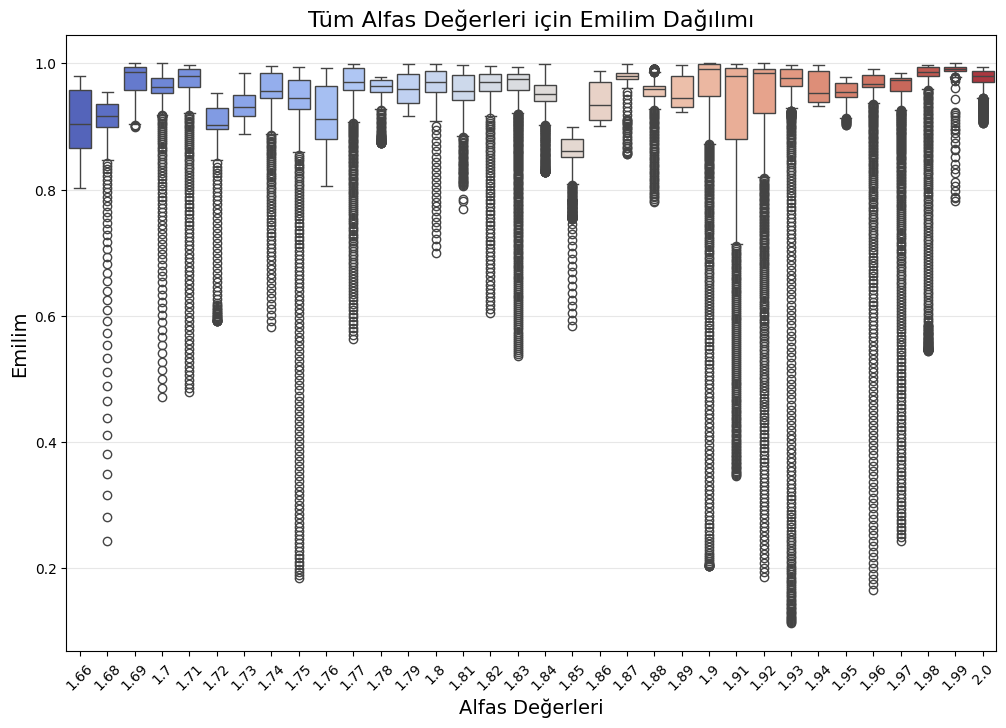

In [26]:
plot_boxplot_for_all_alfas(df)

C:\Users\denem\AppData\Local\Temp\ipykernel_19624\1666604953.py:32: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


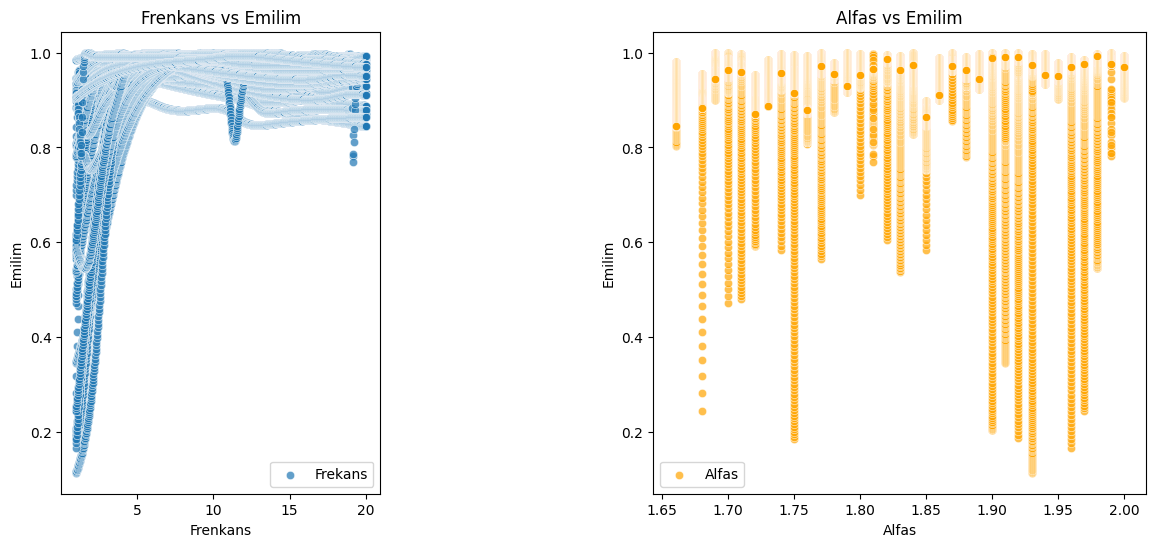

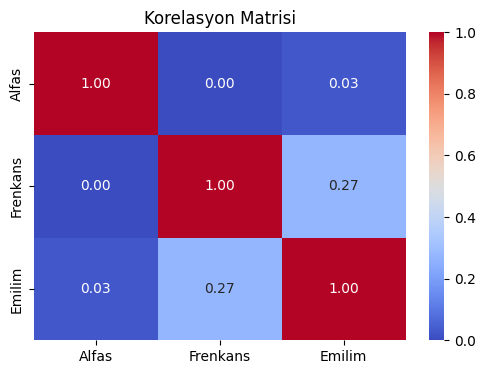

In [7]:
data=df
plt.figure(figsize=(14, 6))
correlation_matrix = data.corr()


# Scatter plot: Alfas ve Frenkans vs Emilim

plt.subplot(1, 3, 1)

sns.scatterplot(x=data['Frenkans'], y=data['Emilim'], alpha=0.7, label="Frekans")

plt.title("Frenkans vs Emilim")

plt.xlabel("Frenkans")

plt.ylabel("Emilim")



plt.subplot(1, 2, 2)

sns.scatterplot(x=data['Alfas'], y=data['Emilim'], alpha=0.7, label="Alfas", color='orange')

plt.title("Alfas vs Emilim")

plt.xlabel("Alfas")

plt.ylabel("Emilim")



plt.tight_layout()

plt.show()



# Korelasyon ısı haritası

plt.figure(figsize=(6, 4))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Korelasyon Matrisi")

plt.show()

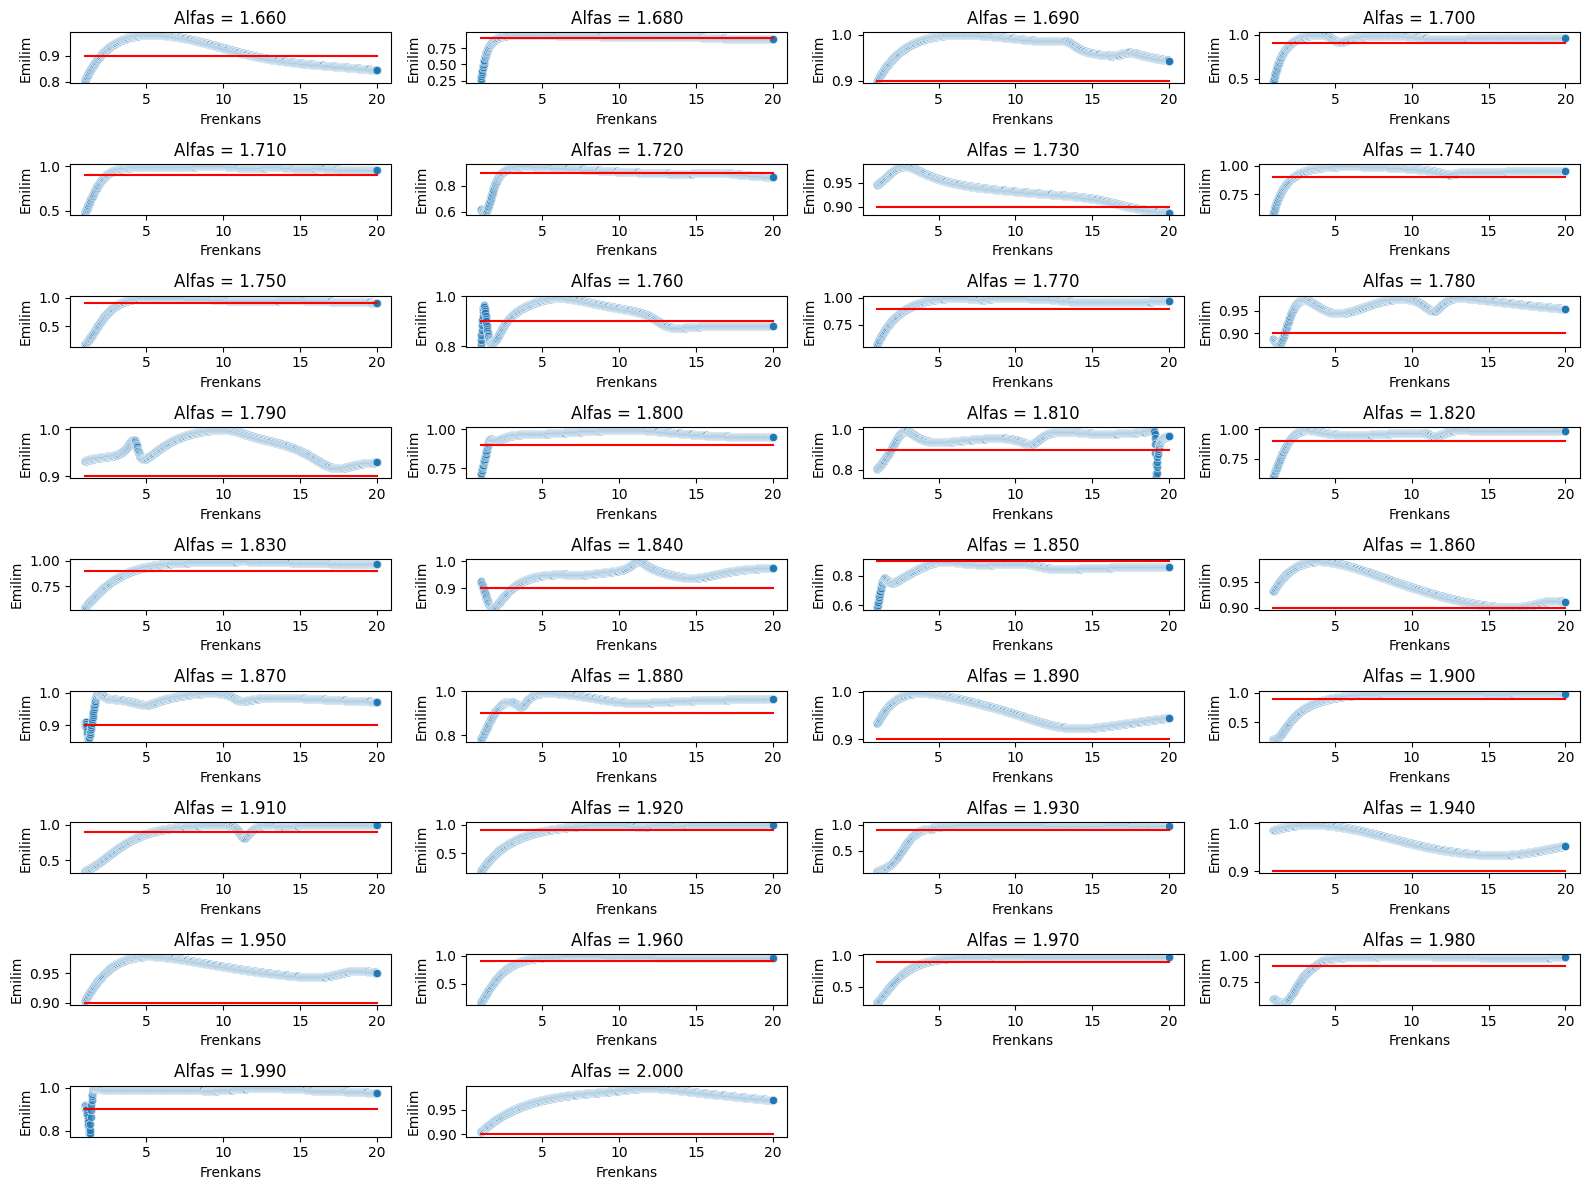

In [13]:
# Alfas değerlerine göre gruplama yapıp, her grup için Frenkans vs Emilim grafiklerini çizelim
unique_alfas = data['Alfas'].unique()

# Grafik oluşturma
plt.figure(figsize=(16, 12))

# Her bir Alfas değeri için ayrı ayrı grafik çizelim
for i, alfas_value in enumerate(unique_alfas):
    plt.subplot(len(unique_alfas)//4 + 1, 4, i+1)
    subset = data[data['Alfas'] == alfas_value]
    sns.scatterplot(x=subset['Frenkans'], y=subset['Emilim'], alpha=0.7)
    plt.plot(subset['Frenkans'],[0.9 for i in range(len(subset['Frenkans']))],color="red")
    plt.title(f"Alfas = {alfas_value:.3f}")
    plt.xlabel("Frenkans")
    plt.ylabel("Emilim")

plt.tight_layout()
plt.show()
